In [84]:
import numpy as np

x = np.loadtxt('../data/q1/linearX.csv', delimiter=',')
y = np.loadtxt('../data/q1/linearY.csv', delimiter=',')

print(x.shape, y.shape)

(100,) (100,)


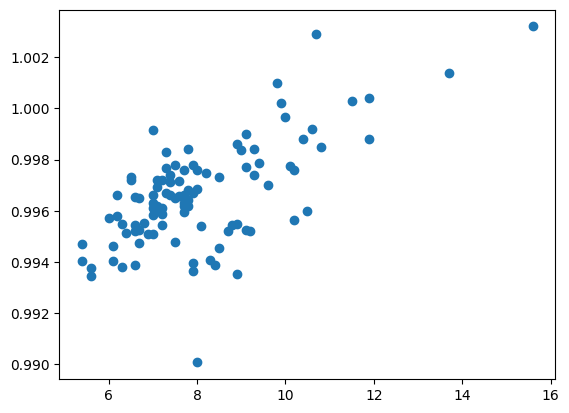

In [85]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

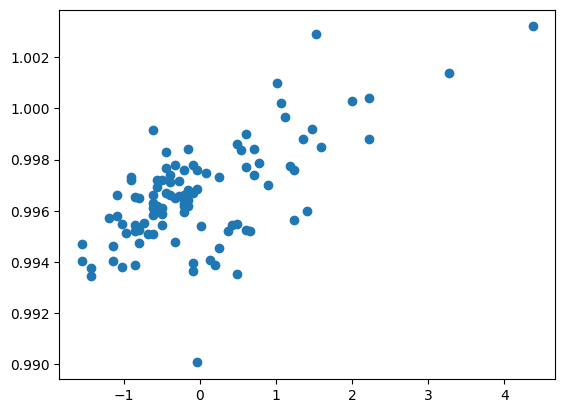

In [86]:
# normalise data
x = (x - np.mean(x)) / np.std(x)

#plot normalised data
plt.scatter(x, y)
plt.show()

In [87]:
theta = [0 for i in range(2)]

def hypothesis(theta, x):
    return theta[0] + theta[1]*x

def cost_function(theta, x, y):
    m = len(x)
    cost = 0
    for i in range(m):
        cost += (hypothesis(theta, x[i]) - y[i])**2
    return cost/(2*m)

def gradient_descent(theta, x, y, alpha, convergence):

    m = len(x)
    cost_history = [cost_function([0,0], x, y)]
    theta_history = [[0,0]]

    converged = False

    while not converged:
        cost_history.append(cost_function(theta, x, y))
        theta_history.append(theta.copy())
        temp0 = theta[0] - (alpha/m)*sum([(hypothesis(theta, x[j]) - y[j]) for j in range(m)])
        temp1 = theta[1] - (alpha/m)*sum([(hypothesis(theta, x[j]) - y[j])*x[j] for j in range(m)])
        theta[0] = temp0
        theta[1] = temp1

        if abs(cost_function(theta, x, y) - cost_history[-1]) < convergence:
            converged = True

    return theta, cost_history, theta_history

In [88]:
theta, cost_history, theta_history = gradient_descent(theta, x, y, 0.01, 0.1**9)

print(theta, cost_history[-1], len(cost_history))

[0.9963085046961379, 0.0013397770034965105] 1.2443213939662906e-06 804


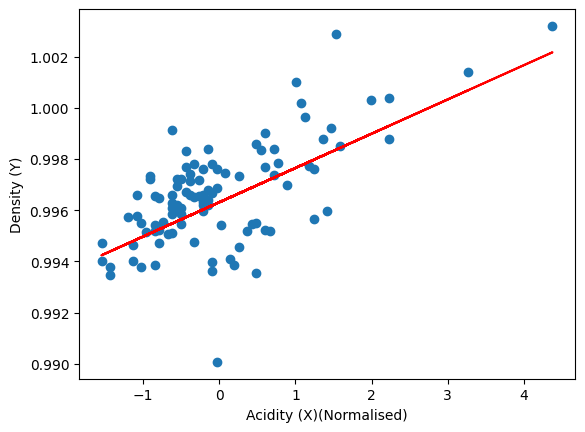

In [89]:
# plot line after training
plt.scatter(x, y)
plt.plot(x, hypothesis(theta, x), color='red')
plt.xlabel('Acidity (X)(Normalised)')
plt.ylabel('Density (Y)')
plt.savefig('../data/q1/plot.jpg')
plt.show()
# save plot as jpeg

In [90]:
cost_history

[0.49662790471450036,
 0.49662790471450036,
 0.48674503318699885,
 0.47705883080289474,
 0.4675653838462343,
 0.45826085648401155,
 0.4491414892162969,
 0.4402035973572099,
 0.43144356954611857,
 0.4228578662884679,
 0.41444301852564464,
 0.4061956262333015,
 0.3981123570475762,
 0.39018994491864684,
 0.3824251887910827,
 0.37481495131045733,
 0.3673561575556966,
 0.3600457937966556,
 0.3528809062764192,
 0.3458586000178359,
 0.3389760376537982,
 0.3322304382808048,
 0.3256190763353339,
 0.319139280492578,
 0.3127884325870932,
 0.3065639665549269,
 0.30046336739680135,
 0.2944841701619222,
 0.28862395895201715,
 0.2828803659451892,
 0.27725107043919733,
 0.27173379791377456,
 0.2663263191116077,
 0.2610264491376038,
 0.2558320465760827,
 0.2507410126255359,
 0.24575129025060505,
 0.24086086335093526,
 0.23606775594656884,
 0.23137003137954934,
 0.22676579153141366,
 0.2222531760562557,
 0.2178303616290535,
 0.21349556120895274,
 0.20924702331721154,
 0.20508303132951639,
 0.20100190278

In [91]:
theta_history

[[0, 0],
 [0, 0],
 [0.009966201000000004, 1.3401960185112995e-05],
 [0.019832739990000008, 2.6669900768374907e-05],
 [0.029600613590100005, 3.980516194580469e-05],
 [0.03927080845419901, 5.280907051146035e-05],
 [0.04884430136965702, 6.56829399914587e-05],
 [0.05832205935596045, 7.842807077665712e-05],
 [0.06770503976240085, 9.104575025400403e-05],
 [0.07699419036477684, 0.00010353725293657715],
 [0.08619044946112907, 0.00011590384059232474],
 [0.09529474596651777, 0.0001281467623715144],
 [0.10430799950685259, 0.00014026725493291236],
 [0.11323112051178406, 0.0001522665425686964],
 [0.12206501030666622, 0.00016414583732812232],
 [0.13081056120359957, 0.0001759063391399538],
 [0.13946865659156357, 0.0001875492359336673],
 [0.14804017102564793, 0.00019907570375944395],
 [0.15652597031539145, 0.00021048690690696193],
 [0.16492691161223755, 0.00022178399802300522],
 [0.17324384349611519, 0.0002329681182278877],
 [0.18147760606115404, 0.00024404039723072146],
 [0.18962903100054251, 0.00025

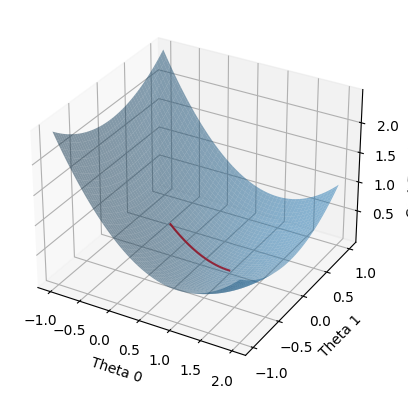

In [92]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def hypothesis(theta, x):
    return theta[0] + theta[1] * x

# Function to draw 3D mesh and save as GIF with a moving line for trajectory
def draw_3d_mesh_and_gif_with_line(theta_history, cost_history, x, y, delay=0.2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Cost Function (J)')
    
    # Convert theta_history to numpy array for easier slicing
    theta_history = np.array(theta_history)
    
    # Create theta0 and theta1 values for the meshgrid
    theta0_vals = np.linspace(min(theta_history[:, 0]) - 1, max(theta_history[:, 0]) + 1, 100)
    theta1_vals = np.linspace(min(theta_history[:, 1]) - 1, max(theta_history[:, 1]) + 1, 100)
    theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
    
    # Compute the cost function for each theta value in the meshgrid
    cost_vals = np.array([cost_function([t0, t1], x, y) for t0, t1 in zip(np.ravel(theta0_mesh), np.ravel(theta1_mesh))])
    cost_mesh = cost_vals.reshape(theta0_mesh.shape)
    
    # Plot the surface
    ax.plot_surface(theta0_mesh, theta1_mesh, cost_mesh, alpha=0.5)
    
    # Initialize line for trajectory
    line, = ax.plot([], [], [], 'r-')
    
    # Define update function for animation
    def update(num):
        line.set_data(theta_history[:num+1, 0], theta_history[:num+1, 1])
        line.set_3d_properties(cost_history[:num+1])
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=range(len(theta_history)), interval=delay*1000)
    
    # Save the animation as GIF
    ani.save('3D_trajectory_line_mesh.gif', writer=PillowWriter(fps=1 / delay))
    
    plt.show()

# Create the 3D mesh plot and GIF with a moving line for trajectory
draw_3d_mesh_and_gif_with_line(theta_history, cost_history, x, y)


In [98]:
def draw_contour_and_gif_with_point(theta_history, cost_history, x, y, delay=0.2, filename='2D_trajectory_point_contour.gif'):
    fig, ax = plt.subplots()
    
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    
    theta_history = np.array(theta_history)
    
    theta0_vals = np.linspace(min(theta_history[:, 0]) - 1, max(theta_history[:, 0]) + 1, 100)
    theta1_vals = np.linspace(min(theta_history[:, 1]) - 1, max(theta_history[:, 1]) + 1, 100)
    theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
    
    cost_vals = np.array([cost_function([t0, t1], x, y) for t0, t1 in zip(np.ravel(theta0_mesh), np.ravel(theta1_mesh))])
    cost_mesh = cost_vals.reshape(theta0_mesh.shape)
    
    CS = ax.contour(theta0_mesh, theta1_mesh, cost_mesh, levels=50, cmap='jet')
    ax.clabel(CS, inline=1, fontsize=10)
    
    point, = ax.plot([], [], 'ro')
    
    def update(num):
        point.set_data(theta_history[num, 0], theta_history[num, 1])
    
    ani = animation.FuncAnimation(fig, update, frames=range(len(theta_history)), interval=delay*1000)
    
    ani.save(filename, writer=PillowWriter(fps=1 / delay))
    
    plt.show()

# Create the 2D contour plot and GIF with a moving point for trajectory



/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_4495/2101663773.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[num, 0], theta_history[num, 1])


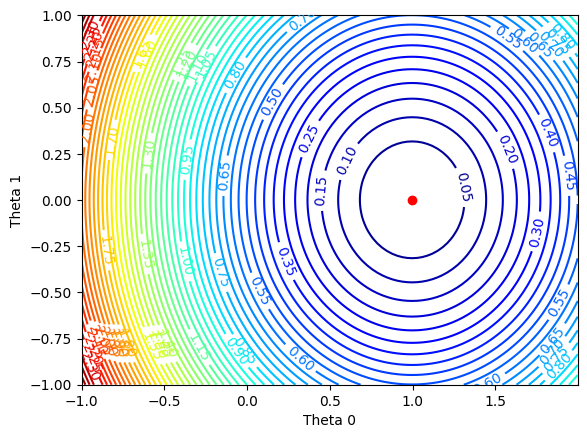

In [100]:
draw_contour_and_gif_with_point(theta_history, cost_history, x, y)

/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_4495/2101663773.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[num, 0], theta_history[num, 1])


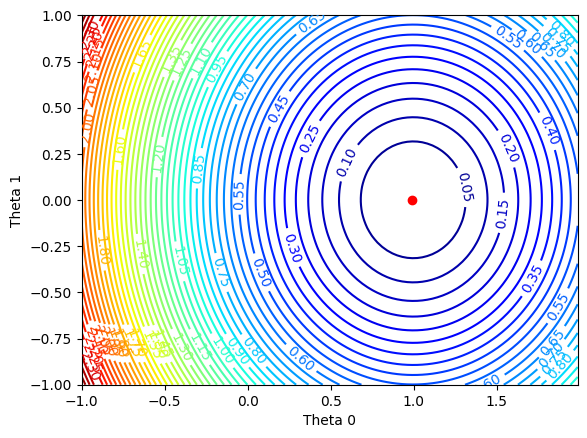

/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_4495/2101663773.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[num, 0], theta_history[num, 1])


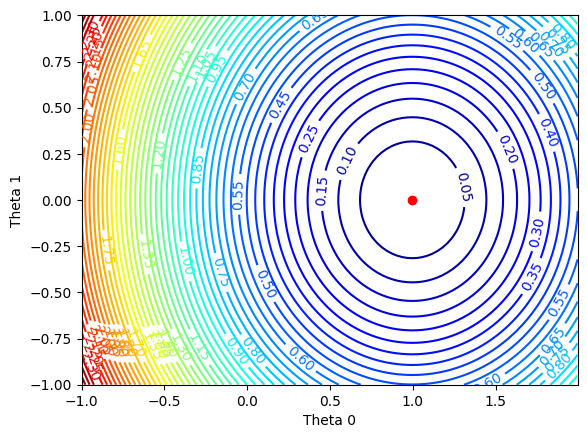

/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_4495/2101663773.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(theta_history[num, 0], theta_history[num, 1])


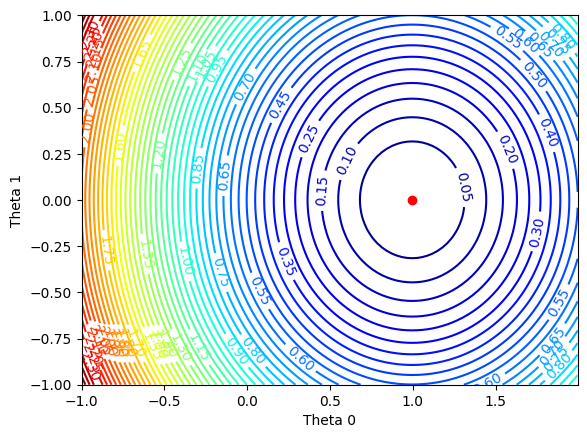

In [99]:
step_sizes = [0.001, 0.025, 0.1]

for step_size in step_sizes:
    _, cost_history, theta_history = gradient_descent([0,0], x, y, step_size, 0.1**7)
    
    draw_contour_and_gif_with_point(theta_history, cost_history, x, y, 0.2, "(e) 2D Contour "+ str(step_size)+".gif")
    